In [2]:
import os
os.chdir("..")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from spa.core import spa
from spa.properties import ThresholdProperty


In [3]:
# Load the data
noise_levels = [1, 2, 3, 4, 5]
proportion = 0.5
confidence = 0.95
intervals = []
for noise_level in noise_levels:
    data = [float(line.rstrip()) for line in open(f"data/noise_levels/{noise_level}.txt")]
    result = spa(data, ThresholdProperty(op='<'), prob_threshold=proportion, confidence=confidence)
    intervals.append(result.confidence_interval)
    

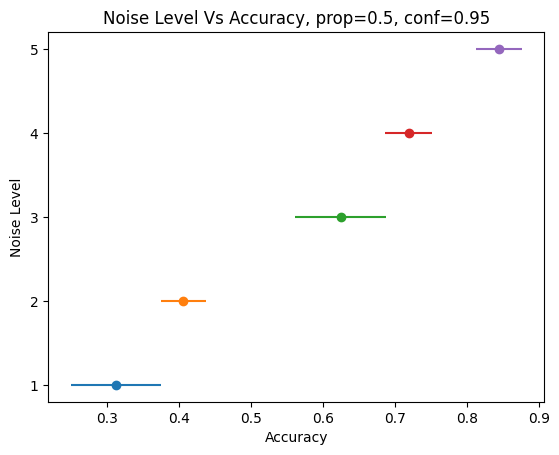

In [6]:
plt.title(f"Noise Level Vs Accuracy, prop={proportion}, conf={confidence}")
plt.xlabel("Accuracy")
plt.ylabel("Noise Level")
plt.yticks(noise_levels)
for i, noise_level in enumerate(noise_levels):
    low = intervals[i].low
    high = intervals[i].high

    plt.errorbar((low + high) / 2, noise_level, xerr=(high - low) / 2, fmt='o')

plt.savefig(f"figures/noise_vs_accuracy_{proportion}_c{confidence}.png")